# Chaotic motion of Double pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
from numpy import sin, cos, pi, sqrt

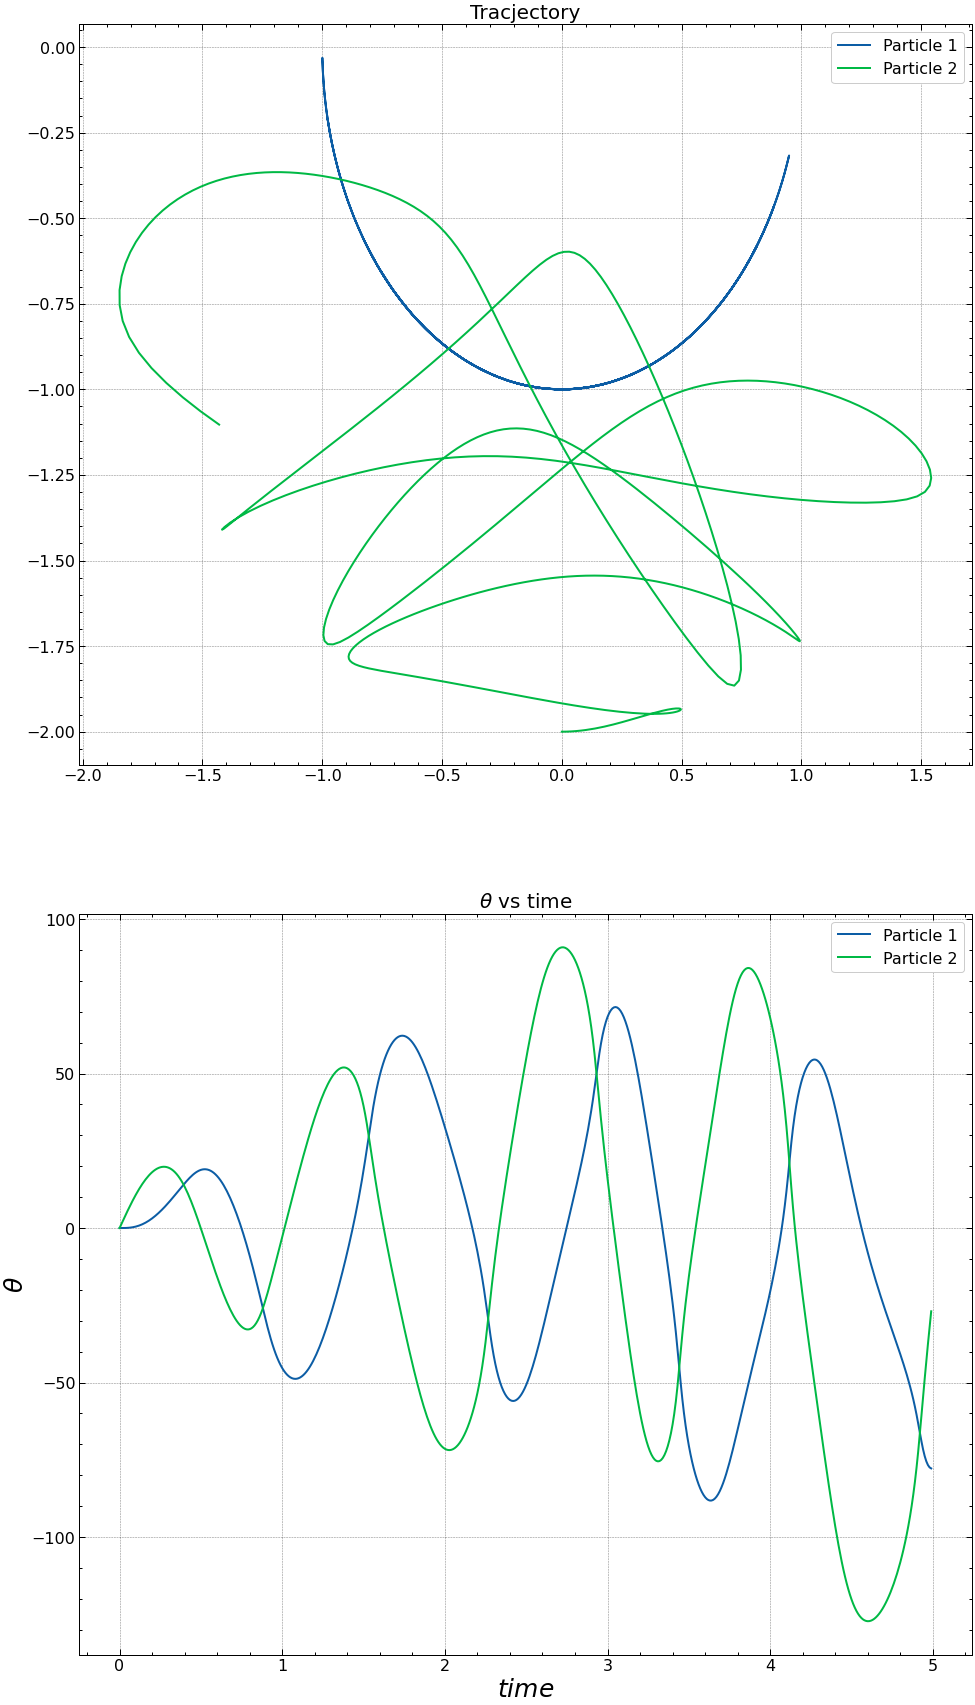

In [2]:
#Constants: 
m1 = 1; m2 = 2; l1 = 1; l2 = 1; g = 9.8

def RtoD(x): return 180*x/pi
def DtoR(x): return pi*x/180

#Initial conditions
ti = 0; tht1 = DtoR(0); tht2 = DtoR(0); w1 = 0; w2 = 2; tf = 5; h = 0.01

#empty list
THT1 = []; THT2 = []; tt = []; W1 = []; W2 = []; x1 = []; y1 = [];x2 = []; y2 =[]

def Omega1(tht1, tht2, w1, w2):
    return (m2*g*l1*cos(tht1 - tht2)*sin(tht2) - m2*l1**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w1**2 - m2*l1*l2*sin(tht1 - tht2)*w2**2 - g*(m1*l1 + m2*l2)*sin(tht1))/((m1 + m2)*l1**2 - m2*l1**2*(cos(tht1 - tht2))**2)
def Omega2(tht1, tht2, w1, w2):
    return ((m2**2/(m1+m2))*l2**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w2**2 - (m2*l2*g*cos(tht1 - tht2)*sin(tht1)*(m1*l1 + m2*l2)/(l1*(m1+m2))) + m2*l1*l2*sin(tht1 - tht2)*w1**2 - m2*g*l2*sin(tht2))/(m2*l2**2 - m2**2*l2**2*(cos(tht1 - tht2)**2/(m1+m2)))

while (tf - ti) >= h:
    tt.append(ti)
    THT1.append(RtoD(tht1))
    x1.append(l1*sin(tht1))
    y1.append(-l1*cos(tht1))
    THT2.append(RtoD(tht2))
    x2.append(l1*sin(tht1) + l2*sin(tht2))
    y2.append(-(l1*cos(tht1) + l2*cos(tht2)))
    W1.append(w1)
    W2.append(w2)
    
    #Euler
    ti += h
    tht1 += h*w1
    tht2 += h*w2
    w1 += h*Omega1(tht1, tht2, w1, w2)
    w2 += h*Omega2(tht1, tht2, w1, w2)
    
#Plotting
plt.figure(figsize=(16, 30))
plt.subplot(211)
plt.title("Tracjectory", size = 20)
plt.plot(x1, y1, label = "Particle 1")
plt.plot(x2, y2, label = "Particle 2")
plt.legend()

plt.subplot(212)
plt.title(r"$\theta$ vs time", size = 20)
plt.plot(tt, THT1, label = "Particle 1")
plt.plot(tt, THT2, label = "Particle 2")
plt.xlabel(r"$time$", size = 25)
plt.ylabel(r"$\theta$", size = 25)
plt.legend()


plt.show()